<a href="https://colab.research.google.com/github/andresdp95/Project/blob/main/Data_Analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group:
1. Andres David Paredes Naranjo
2. Raghav

Source of data: https://www.kaggle.com/datasets/selonamaris/large-industrial-pump-maintenance-dataset

Schema: Here we are trying to predict and classify the maintenance required for an industrial pump based on features such as Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours.
All of our features are numeric, we don't have any categorical features in the dataset. So we will try to create ranges of all these numerical features and try the classification.

Later we will also perform Confusion Matrix, Random Forest & various types of regressions, to compare accuracies and other key metrics using k-fold test validations

1. Ridge Classifier
2. Logistic regression
3. Perceptron
4. Gaussian etc.

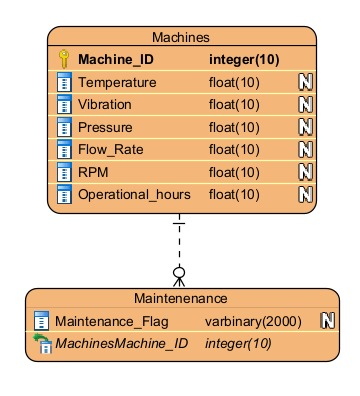


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
pio.templates.default = 'plotly_white'

Pump_ID: Unique identifier for each pump (Integer).

Temperature: Temperature reading of the pump (Float).

Vibration: Vibration intensity measurement of the pump (Float).

Pressure: Pressure level recorded in the pump (Float).

Flow_Rate: Flow rate of the fluid passing through the pump (Float).

RPM: Rotational speed of the pump in revolutions per minute (Float).

Operational_Hours: Number of hours the pump has been operational (Float).

Maintenance_Flag: Binary indicator (0 or 1) showing whether the pump required maintenance (1) or not (0) (Integer).

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/andresdp95/Project/1484f6b0921b4e57ade16c013a5bdf0a8b0c214b/Large_Industrial_Pump_Maintenance_Dataset.csv")
df

Pump_ID  Temperature  Vibration    Pressure  Flow_Rate          RPM  \
0            2   127.508350   2.369397  136.021029   6.501492  1444.191922   
1            4    88.975185   4.541126  147.516973   7.001516  1004.802496   
2            3    61.832325   2.542112  220.858577   8.824368  2597.662712   
3            3   106.250344   2.834452  145.817091  16.283512  2280.926281   
4            2    84.815865   3.119709  235.476221   8.385183  2594.131667   
...        ...          ...        ...         ...        ...          ...   
19995        5   133.824387   2.193536  162.072728   6.272785  1939.452036   
19996        1   100.976892   4.906084  109.160420  10.000945  2267.788691   
19997        3   109.563715   0.769374  180.743971  18.706712  2758.781582   
19998        3   116.730910   3.279518  289.369874  14.570612  1683.361885   
19999        1   112.119704   2.662803  217.675584  15.373061  2160.816062   

       Operational_Hours  Maintenance_Flag  
0            3966.793672                 1  
1            3673.288933                 0  
2            5489.061016                 1  
3            3134.783015                 0  
4             761.533173                 1  
...                  ...               ...  
19995        4327.831926                 1  
19996        7474.000467                 1  
19997        8935.787395                 1  
19998        4576.992294                 0  
19999        1245.023172                 1  

[20000 rows x 8 columns]

## Checking for nulls and uniques

In [ ]:
df['Maintenance_Flag'].unique()

array([1, 0])

In [ ]:
df[df['Temperature'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:
df[df['Pump_ID'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:

df[df['Vibration'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:
df[df['Pressure'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:
df[df['Flow_Rate'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:
df[df['Flow_Rate'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:
df[df['RPM'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:
df[df['Operational_Hours'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

In [ ]:
df[df['Maintenance_Flag'].isna() == True]

Empty DataFrame
Columns: [Pump_ID, Temperature, Vibration, Pressure, Flow_Rate, RPM, Operational_Hours, Maintenance_Flag]
Index: []

## Info and Descriptive Stats

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pump_ID            20000 non-null  int64  
 1   Temperature        20000 non-null  float64
 2   Vibration          20000 non-null  float64
 3   Pressure           20000 non-null  float64
 4   Flow_Rate          20000 non-null  float64
 5   RPM                20000 non-null  float64
 6   Operational_Hours  20000 non-null  float64
 7   Maintenance_Flag   20000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [ ]:
df.drop(["Pump_ID","Maintenance_Flag"], axis=1).describe()

Temperature     Vibration      Pressure     Flow_Rate           RPM  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean     100.371340      2.527856    200.381615     10.248111   2005.617191   
std       28.851380      1.416466     57.823085      5.646254    576.506659   
min       50.001091      0.100427    100.007052      0.500453   1000.041781   
25%       75.403208      1.300199    149.858536      5.354906   1506.073027   
50%      100.752882      2.517715    200.513919     10.284599   2009.733748   
75%      125.422558      3.755519    250.271651     15.149339   2503.339719   
max      149.995262      4.999804    299.980845     19.999434   2999.915184   

       Operational_Hours  
count       20000.000000  
mean         5030.481037  
std          2867.804461  
min           100.213880  
25%          2531.552283  
50%          5032.760791  
75%          7504.463849  
max          9998.768972

from matplotlib import pyplot as plt
_df_0['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Vibration'].plot(kind='hist', bins=20, title='Vibration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pressure'].plot(kind='hist', bins=20, title='Pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Flow_Rate'].plot(kind='hist', bins=20, title='Flow_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Temperature', y='Vibration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Vibration', y='Pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Pressure', y='Flow_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Flow_Rate', y='RPM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Vibration'].plot(kind='line', figsize=(8, 4), title='Vibration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Pressure'].plot(kind='line', figsize=(8, 4), title='Pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Flow_Rate'].plot(kind='line', figsize=(8, 4), title='Flow_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.skew(axis=0, skipna=True, numeric_only=True)

Pump_ID              0.002484
Temperature         -0.018397
Vibration            0.014934
Pressure            -0.012605
Flow_Rate           -0.007242
RPM                 -0.003743
Operational_Hours    0.009856
Maintenance_Flag     0.006401
dtype: float64

## Covariance, correlation and scatter plots

In [ ]:
df.cov(numeric_only=True)

Pump_ID  Temperature  Vibration     Pressure  Flow_Rate  \
Pump_ID             1.989137    -0.072807  -0.014831    -0.528740   0.057700   
Temperature        -0.072807   832.402127  -0.156444    17.263570  -1.145223   
Vibration          -0.014831    -0.156444   2.006375    -0.054843  -0.086500   
Pressure           -0.528740    17.263570  -0.054843  3343.509145   3.867457   
Flow_Rate           0.057700    -1.145223  -0.086500     3.867457  31.880189   
RPM                -3.096930   -45.179359  11.471706   433.729695   5.720420   
Operational_Hours -12.015110  -468.480369  26.002466   709.838328 -69.023286   
Maintenance_Flag   -0.005070    -0.188333   0.005365    -0.149292   0.024487   

                             RPM  Operational_Hours  Maintenance_Flag  
Pump_ID                -3.096930      -1.201511e+01         -0.005070  
Temperature           -45.179359      -4.684804e+02         -0.188333  
Vibration              11.471706       2.600247e+01          0.005365  
Pressure              433.729695       7.098383e+02         -0.149292  
Flow_Rate               5.720420      -6.902329e+01          0.024487  
RPM                332359.927525       1.345659e+04         -2.468787  
Operational_Hours   13456.587887       8.224302e+06         -4.442788  
Maintenance_Flag       -2.468787      -4.442788e+00          0.250010

In [ ]:
# Trying correlation with spearman method
df.corr(method='spearman', numeric_only=True)

Pump_ID  Temperature  Vibration  Pressure  Flow_Rate  \
Pump_ID            1.000000    -0.001910  -0.007414 -0.006549   0.007176   
Temperature       -0.001910     1.000000  -0.003762  0.010256  -0.007019   
Vibration         -0.007414    -0.003762   1.000000 -0.000676  -0.010858   
Pressure          -0.006549     0.010256  -0.000676  1.000000   0.011845   
Flow_Rate          0.007176    -0.007019  -0.010858  0.011845   1.000000   
RPM               -0.003864    -0.002735   0.014042  0.013040   0.001741   
Operational_Hours -0.002964    -0.005510   0.006401  0.004170  -0.004243   
Maintenance_Flag  -0.007191    -0.013073   0.007581 -0.005222   0.008638   

                        RPM  Operational_Hours  Maintenance_Flag  
Pump_ID           -0.003864          -0.002964         -0.007191  
Temperature       -0.002735          -0.005510         -0.013073  
Vibration          0.014042           0.006401          0.007581  
Pressure           0.013040           0.004170         -0.005222  
Flow_Rate          0.001741          -0.004243          0.008638  
RPM                1.000000           0.008103         -0.008558  
Operational_Hours  0.008103           1.000000         -0.003126  
Maintenance_Flag  -0.008558          -0.003126          1.000000

In [ ]:
# Trying correlation with kendall method
df.corr(method='kendall', numeric_only=True)

Pump_ID  Temperature  Vibration  Pressure  Flow_Rate  \
Pump_ID            1.000000    -0.001415  -0.005403 -0.004791   0.005300   
Temperature       -0.001415     1.000000  -0.002522  0.006834  -0.004758   
Vibration         -0.005403    -0.002522   1.000000 -0.000531  -0.007246   
Pressure          -0.004791     0.006834  -0.000531  1.000000   0.007830   
Flow_Rate          0.005300    -0.004758  -0.007246  0.007830   1.000000   
RPM               -0.002847    -0.001828   0.009321  0.008719   0.001189   
Operational_Hours -0.002150    -0.003673   0.004291  0.002784  -0.002807   
Maintenance_Flag  -0.006432    -0.010675   0.006190 -0.004264   0.007053   

                        RPM  Operational_Hours  Maintenance_Flag  
Pump_ID           -0.002847          -0.002150         -0.006432  
Temperature       -0.001828          -0.003673         -0.010675  
Vibration          0.009321           0.004291          0.006190  
Pressure           0.008719           0.002784         -0.004264  
Flow_Rate          0.001189          -0.002807          0.007053  
RPM                1.000000           0.005393         -0.006988  
Operational_Hours  0.005393           1.000000         -0.002553  
Maintenance_Flag  -0.006988          -0.002553          1.000000

In [ ]:
# Trying correlation with pearson method
df.corr(method='pearson', numeric_only=True)

Pump_ID  Temperature  Vibration  Pressure  Flow_Rate  \
Pump_ID            1.000000    -0.001789  -0.007424 -0.006483   0.007246   
Temperature       -0.001789     1.000000  -0.003828  0.010348  -0.007030   
Vibration         -0.007424    -0.003828   1.000000 -0.000670  -0.010816   
Pressure          -0.006483     0.010348  -0.000670  1.000000   0.011846   
Flow_Rate          0.007246    -0.007030  -0.010816  0.011846   1.000000   
RPM               -0.003809    -0.002716   0.014048  0.013011   0.001757   
Operational_Hours -0.002971    -0.005662   0.006401  0.004281  -0.004263   
Maintenance_Flag  -0.007189    -0.013055   0.007575 -0.005164   0.008674   

                        RPM  Operational_Hours  Maintenance_Flag  
Pump_ID           -0.003809          -0.002971         -0.007189  
Temperature       -0.002716          -0.005662         -0.013055  
Vibration          0.014048           0.006401          0.007575  
Pressure           0.013011           0.004281         -0.005164  
Flow_Rate          0.001757          -0.004263          0.008674  
RPM                1.000000           0.008139         -0.008564  
Operational_Hours  0.008139           1.000000         -0.003098  
Maintenance_Flag  -0.008564          -0.003098          1.000000

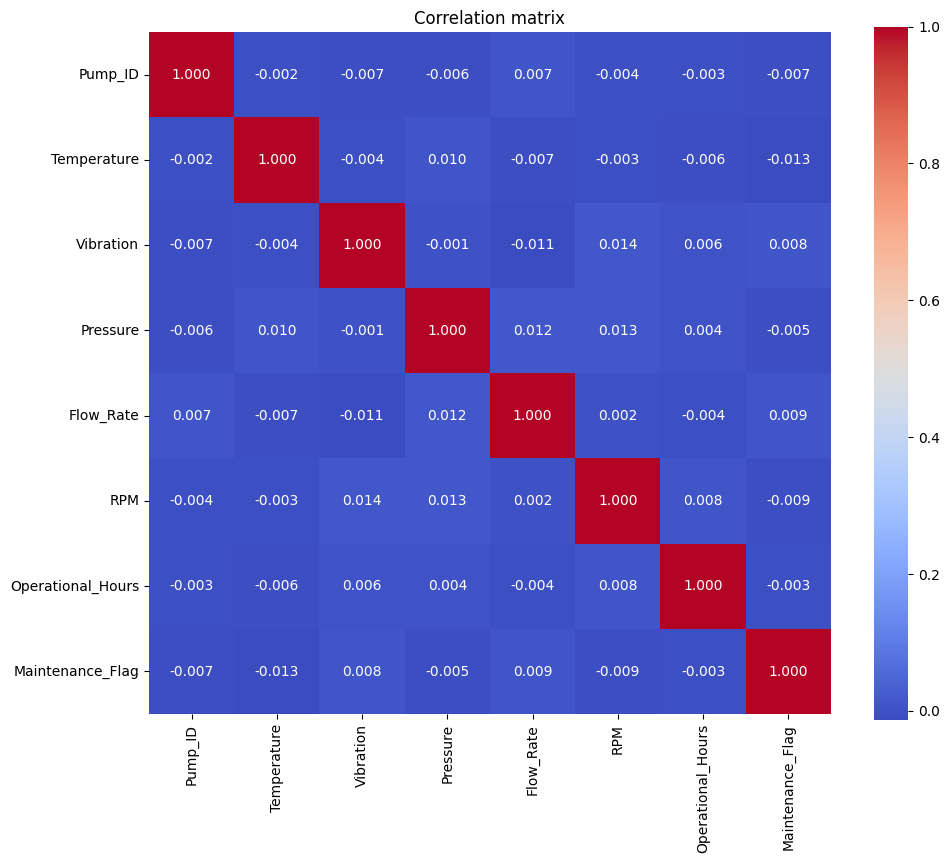

<Figure size 640x480 with 0 Axes>

In [ ]:
# Creating the correlation matrix
correl_m = df.corr(numeric_only=True)
plt.figure(figsize=(11, 9))
sns.heatmap(correl_m, annot=True, cmap='coolwarm', fmt=".3f", square=True, cbar_kws={"shrink": 1.0})
plt.title("Correlation matrix")
plt.show()
plt.tight_layout()
plt.show()

Since we have low correlation between features, our data has a reduced multi-collinearity.

In [ ]:
# Scatter charts for features and target
fig = px.scatter_matrix(df, height=1700, title="Scatter matrix of Large Industrial Pump Data")
fig.show()

##Outlier check

In [ ]:
# Checking values outisde IQR
temperature_df = df['Temperature']
rangIQ = temperature_df.quantile(.75) - temperature_df.quantile(.25)
atTemp = temperature_df[~temperature_df.between(temperature_df.quantile(.25) - rangIQ*3, temperature_df.quantile(.75) + rangIQ*3, inclusive="neither")].count()
print('Temperature:',atTemp)
vibration_df = df['Vibration']
rangIQ1 = vibration_df.quantile(.75) - vibration_df.quantile(.25)
atVib = vibration_df[~vibration_df.between(vibration_df.quantile(.25) - rangIQ1*3, vibration_df.quantile(.75) + rangIQ1*3, inclusive="neither")].count()
print('Vibration:',atVib)
pressure_df = df['Pressure']
rangIQ2 = pressure_df.quantile(.75) - pressure_df.quantile(.25)
atPres = pressure_df[~pressure_df.between(pressure_df.quantile(.25) - rangIQ2*3, pressure_df.quantile(.75) + rangIQ2*3, inclusive="neither")].count()
print('Temperature:',atPres)
flow_df = df['Flow_Rate']
rangIQ3 = flow_df.quantile(.75) - flow_df.quantile(.25)
atVib = flow_df[~flow_df.between(flow_df.quantile(.25) - rangIQ3*3, flow_df.quantile(.75) + rangIQ3*3, inclusive="neither")].count()
print('Vibration:',atVib)

Temperature: 0
Vibration: 0
Temperature: 0
Vibration: 0


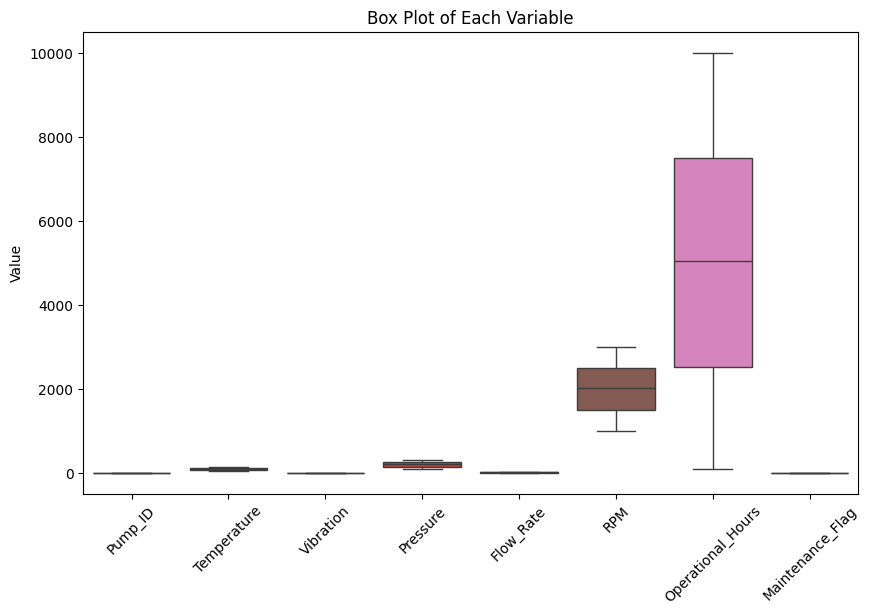

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Each Variable")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.show()

In [ ]:
px.histogram(data_frame=df, x="Flow_Rate", color="Maintenance_Flag", width=900)

In [ ]:
px.histogram(data_frame=df, x="RPM", color="Maintenance_Flag", width=900)

In [ ]:
px.histogram(data_frame=df, x="Operational_Hours", color="Maintenance_Flag", width=900)

In [ ]:
px.histogram(data_frame=df, x="Temperature", color="Maintenance_Flag", width=900)

In [ ]:
px.histogram(data_frame=df, x="Vibration", color="Maintenance_Flag", width=900)

## Checking mean of maintenance required column

In [ ]:
df['Maintenance_Flag'].mean()

0.4984

This means that ~50% of our sample requires maintenance and the other ~50% does not

**Brief Outline until Milestone 2:**

1. Since we have a clean and usable dataset, we will perform various classification models and compare key metrics.
2. Our main focus will be to maximize recall, as we want to get a higher accuracy on judging which machines actually need a maintenance. This can help save resources for the industry.
3. We will also compare the scores of various models and accuracies as well, since here we cannot predict either 1 or 0 for the entire data set and achieve a accuracy of more than 50%, accuracy might also be relevant to look at.
4. We will also try some state of the art models which are yet to be discussed in the class.
5. We will also plot the tradeoff between True Negative and False Positive Rate.

***Logistic regression***

In [ ]:
df

X= df.drop(['Maintenance_Flag','Pump_ID'], axis=1)
y= df['Maintenance_Flag']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)

for train, test in KFold(n_splits=5).split(X_train):
    X_train1, X_test1 = X_train.iloc[train], X_train.iloc[test]
    y_train1, y_test1 = y_train.iloc[train], y_train.iloc[test]
    model.fit(X_train1, y_train1)
    print("Train Score :", model.score(X_train1, y_train1),"Test Score :",model.score(X_test1, y_test1))

print ("Holdout Score : ", model.score(X_test, y_test))


Train Score : 0.50515625 Test Score : 0.49875
Train Score : 0.5071875 Test Score : 0.5021875
Train Score : 0.506171875 Test Score : 0.4978125
Train Score : 0.5053125 Test Score : 0.4984375
Train Score : 0.508828125 Test Score : 0.4853125
Holdout Score :  0.503


***Decision Tree***

In [ ]:




#reg = DecisionTreeClassifier(max_depth=4)
#reg.fit(X_train,y_train)
#print("Training Score :",reg.score(X_train,y_train), "Test Score :",reg.score(X_test,y_test))

Training Score : 0.5118125 Test Score : 0.5025


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
results = []
for k in range(1, 15):
    reg = DecisionTreeClassifier(max_depth=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, reg.predict(X_test))
    })
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1   0.50575
1    2   0.50450
2    3   0.49975
3    4   0.50250
4    5   0.50275
5    6   0.50275
6    7   0.49725
7    8   0.49775
8    9   0.49575
9   10   0.49550
10  11   0.49600
11  12   0.49750
12  13   0.49350
13  14   0.49825


In [ ]:
reg = DecisionTreeClassifier(max_depth=6)
reg.fit(X_train,y_train)
print("Training Score :",reg.score(X_train,y_train), "Test Score :",reg.score(X_test,y_test))

Training Score : 0.5166875 Test Score : 0.50275


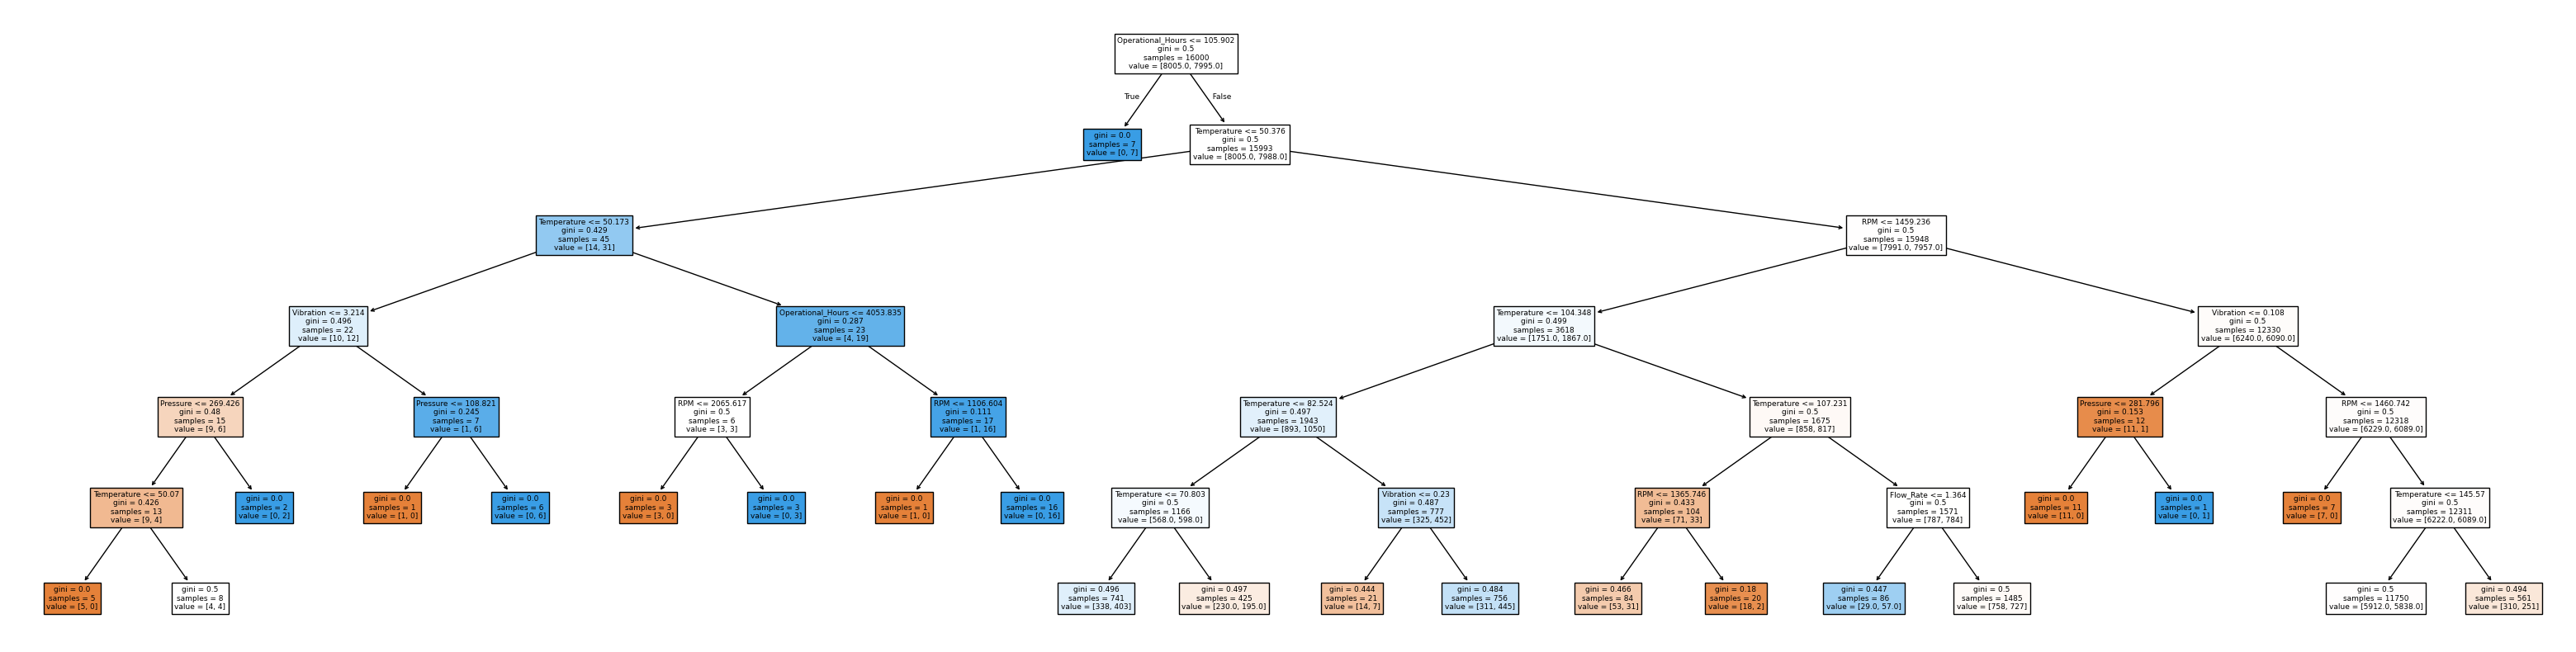

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
tree.plot_tree(reg, max_depth=6, feature_names=df.columns.drop(['Maintenance_Flag','Pump_ID']), filled=True)
plt.show()

**KBINS**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
kb.fit(X)
X_kbin = pd.DataFrame(kb.transform(X), columns=X.columns)
X_kbin.head()

Temperature  Vibration  Pressure  Flow_Rate  RPM  Operational_Hours
0          5.0        3.0       1.0        2.0  1.0                2.0
1          2.0        6.0       1.0        2.0  0.0                2.0
2          0.0        3.0       4.0        2.0  5.0                3.0
3          3.0        3.0       1.0        5.0  4.0                2.0
4          2.0        4.0       4.0        2.0  5.0                0.0

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Splitting the feature and target dataframe into holdout and training data

X_train, X_test, y_train, y_test = train_test_split(X_kbin, y, test_size=0.2, random_state=0)

# Performing 5-fold test and training the model for MultinomialNB using default parameters
kfold = KFold(5).split(X_train)
clf = MultinomialNB()

print("Multinomial Naive Bayes Scores on training data split into 5-fold \n")
for train, test in kfold:
  X_train4,y_train4 = X_train.iloc[train],y_train.iloc[train]
  X_test4,y_test4 = X_train.iloc[test],y_train.iloc[test]
  clf.fit(X_train4, y_train4)
  print("Training Score :",clf.score(X_train4, y_train4),"Test Score :", clf.score(X_test4, y_test4))

print("\nAccuracy score for MultinomialNB on holdout data is :",clf.score(X_test, y_test))

Multinomial Naive Bayes Scores on training data split into 5-fold 

Training Score : 0.50640625 Test Score : 0.494375
Training Score : 0.5065625 Test Score : 0.500625
Training Score : 0.50265625 Test Score : 0.4934375
Training Score : 0.50421875 Test Score : 0.501875
Training Score : 0.509921875 Test Score : 0.49125

Accuracy score for MultinomialNB on holdout data is : 0.5045


In [ ]:
y_hat = pd.DataFrame(clf.predict(X_test), columns=['Predicted'])
y_hat.head()

Predicted
0          1
1          0
2          0
3          1
4          0

In [ ]:
from sklearn import metrics
print("Recall and Precision scores :\n",metrics.classification_report(y_test, y_hat['Predicted'], zero_division=0))

Recall and Precision scores :
               precision    recall  f1-score   support

           0       0.51      0.50      0.51      2027
           1       0.50      0.51      0.50      1973

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1   0.48150
1    2   0.49525
2    3   0.48775
3    4   0.49500
4    5   0.48950
5    6   0.50050
6    7   0.49575
7    8   0.49625
8    9   0.48925
9   10   0.49275
10  11   0.48500
11  12   0.49125
12  13   0.48825
13  14   0.50000


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
reg.fit(X_train,y_train)
print("Training Score :",reg.score(X_train,y_train), "Test Score :",reg.score(X_test,y_test))

Training Score : 0.546 Test Score : 0.4925


***RANDOM FOREST***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
results=[]
for k in range(1, 15):
  reg = RandomForestClassifier(max_features=k/15, max_depth=10, n_estimators=200)
  results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.4935
1    2    0.4935
2    3    0.4935
3    4    0.4935
4    5    0.4935
5    6    0.4935
6    7    0.4935
7    8    0.4935
8    9    0.4935
9   10    0.4935
10  11    0.4935
11  12    0.4935
12  13    0.4935
13  14    0.4935


In [ ]:
results=[]
for k in range(1, 15):
  reg = RandomForestClassifier(max_features=0.5, max_depth=k, n_estimators=200)
  results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.4935
1    2    0.4935
2    3    0.4935
3    4    0.4935
4    5    0.4935
5    6    0.4935
6    7    0.4935
7    8    0.4935
8    9    0.4935
9   10    0.4935
10  11    0.4935
11  12    0.4935
12  13    0.4935
13  14    0.4935


In [ ]:
results=[]
for k in range(1, 15):
  reg = RandomForestClassifier(max_features=0.5, max_depth=10, n_estimators=k*100)
  results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.4935
1    2    0.4935
2    3    0.4935
3    4    0.4935
4    5    0.4935
5    6    0.4935
6    7    0.4935
7    8    0.4935
8    9    0.4935
9   10    0.4935
10  11    0.4935
11  12    0.4935
12  13    0.4935
13  14    0.4935


In [ ]:
reg = RandomForestClassifier(max_features=0.5, max_depth=10, n_estimators=100)
reg.fit(X_train,y_train)
print("Training Score :",reg.score(X_train,y_train), "Test Score :",reg.score(X_test,y_test))

Training Score : 0.81675 Test Score : 0.507


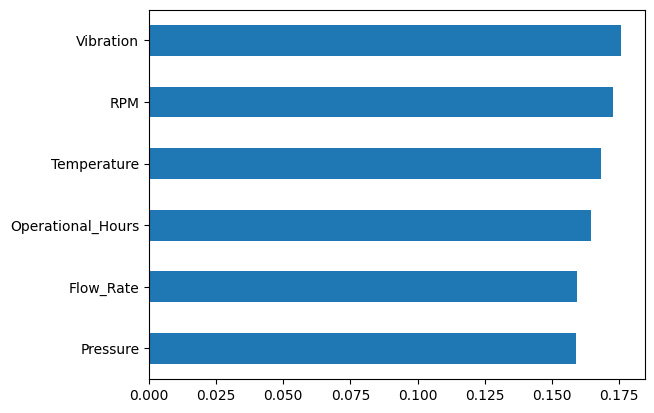

In [ ]:
fi = reg.feature_importances_
fimp = pd.Series(fi, index=X.columns)
ax = fimp.sort_values().plot.barh()

In [ ]:
y_hat_rf = pd.DataFrame(reg.predict(X_test), columns=['Predicted'])
print("Recall and Precision scores :\n",metrics.classification_report(y_test, y_hat_rf['Predicted'], zero_division=0))

Recall and Precision scores :
               precision    recall  f1-score   support

           0       0.51      0.53      0.52      2027
           1       0.50      0.48      0.49      1973

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



***BOOSTING***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
results=[]
for k in range(1, 15):
  reg = GradientBoostingClassifier(n_estimators=k*100)
  results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.4935
1    2    0.4935
2    3    0.4935
3    4    0.4935
4    5    0.4935
5    6    0.4935
6    7    0.4935
7    8    0.4935
8    9    0.4935
9   10    0.4935
10  11    0.4935
11  12    0.4935
12  13    0.4935
13  14    0.4935


In [ ]:
reg = GradientBoostingClassifier(n_estimators=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg.fit(X_train,y_train)
reg.score(X_train,y_train), reg.score(X_test,y_test)

(0.6299375, 0.508)

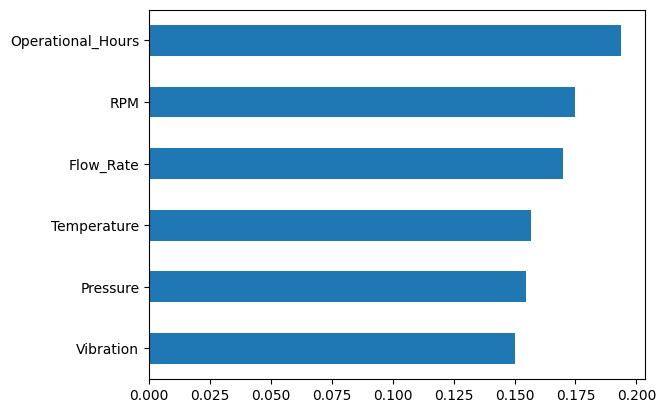

In [ ]:
fi = reg.feature_importances_
fimp = pd.Series(fi, index=X.columns)
ax = fimp.sort_values().plot.barh()

In [ ]:
y_hat_bo = pd.DataFrame(reg.predict(X_test), columns=['Predicted'])
print("Recall and Precision scores :\n",metrics.classification_report(y_test, y_hat_bo['Predicted'], zero_division=0))

Recall and Precision scores :
               precision    recall  f1-score   support

           0       0.51      0.54      0.53      2027
           1       0.50      0.47      0.49      1973

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



In [ ]:
pump1 = df[df['Pump_ID'] == 1].sort_values(by=['Operational_Hours'])
pump2 = df[df['Pump_ID'] == 2].sort_values(by=['Operational_Hours'])
pump1

Pump_ID  Temperature  Vibration    Pressure  Flow_Rate          RPM  \
17046        1    52.764489   0.515555  292.092812   8.686729  2589.859050   
13790        1   105.112862   4.634534  149.910129  14.480420  2595.685163   
1015         1    94.058375   3.314497  167.628325  10.367928  1057.763759   
9852         1    88.408969   2.935110  203.937336  10.179674  2554.230952   
4610         1   127.173683   2.443709  223.970971   2.777607  2932.479373   
...        ...          ...        ...         ...        ...          ...   
507          1    60.107427   0.542314  116.831902  10.090041  2363.228146   
15756        1    68.662792   4.260246  241.528222   9.657009  2328.698149   
1344         1    76.101606   4.010460  278.160719  14.200402  1170.663286   
16074        1   118.657133   3.274682  192.991751   2.163113  1758.658214   
2963         1    52.981155   0.310714  201.648053   1.008063  1876.312530   

       Operational_Hours  Maintenance_Flag  
17046         100.213880                 0  
13790         101.733243                 1  
1015          101.880956                 1  
9852          107.104976                 0  
4610          107.449827                 0  
...                  ...               ...  
507          9995.126660                 0  
15756        9995.261920                 0  
1344         9995.522628                 0  
16074        9995.820695                 1  
2963         9997.599467                 0  

[3911 rows x 8 columns]

In [ ]:
pump2

Pump_ID  Temperature  Vibration    Pressure  Flow_Rate          RPM  \
17395        2    54.984540   1.118765  165.617787   3.384418  2032.057570   
16205        2   124.266178   2.078166  269.434990  15.247868  1188.122498   
2123         2   126.672674   0.368167  250.595063  17.242470  2761.408215   
3034         2   143.798178   3.368938  133.451203  18.018610  1225.021476   
3696         2   124.876782   4.301917  222.463119   1.447120  1227.607561   
...        ...          ...        ...         ...        ...          ...   
1098         2    79.358560   4.836016  101.404202   7.627983  1276.822200   
2083         2   140.533178   0.664093  171.839942  10.135094  1520.448616   
6609         2    84.719384   2.523030  150.164102   4.352372  2165.256049   
14048        2    51.994125   2.383187  199.833142   0.589275  1643.969791   
4274         2   148.233126   1.974442  186.456006  10.519028  1316.953057   

       Operational_Hours  Maintenance_Flag  
17395         104.567734                 1  
16205         105.364961                 0  
2123          107.206409                 0  
3034          108.067710                 1  
3696          108.933136                 0  
...                  ...               ...  
1098         9990.116289                 0  
2083         9991.575581                 1  
6609         9993.205877                 1  
14048        9998.667113                 0  
4274         9998.768972                 0  

[4129 rows x 8 columns]